<a href="https://colab.research.google.com/github/Muhammadsodiq0011/Muhammadsodiq0011/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import fastai

#Checking libraries 
print(torch.__version__)
print(fastai.__version__)

1.11.0+cu113
2.6.3


In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!cd OIDv4_ToolKit && pip install -r requirements.txt


In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content  --classes Tank Submarine Missile --type_csv train --limit 200

Model


In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path=Path('train')

# fls = get_image_files(path)
# failed=verify_images(path)

#Datablock
Weapons=DataBlock(
   blocks=(ImageBlock,CategoryBlock),
   get_items=get_image_files,
   splitter=RandomSplitter(valid_pct=0.2,seed=42),
   item_tfms=Resize(224),
   get_y=parent_label,
)
#Dataloader creating
dls=Weapons.dataloaders(path)

#datasetni check

#train
learn=cnn_learner(dls,resnet34, metrics=accuracy)
learn.fine_tune(4)



/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.157863,0.316661,0.910959,03:47


epoch,train_loss,valid_loss,accuracy,time
0,0.275673,0.229915,0.910959,05:12
1,0.163696,0.284417,0.931507,05:13


epoch,train_loss,valid_loss,accuracy,time
0,0.275673,0.229915,0.910959,05:12
1,0.163696,0.284417,0.931507,05:13
2,0.115993,0.302971,0.917808,05:12
3,0.092487,0.291486,0.924658,05:10


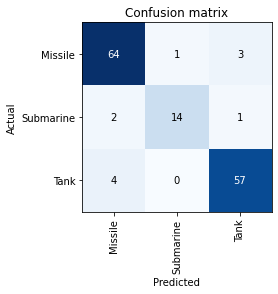

In [ ]:
# checking model's accuracy
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

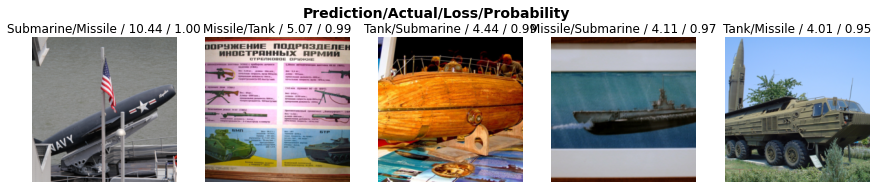

In [ ]:
#top losses
interp.plot_top_losses(5, nrows=1)

In [ ]:
upload=widgets.FileUpload()
upload


FileUpload(value={}, description='Upload')

Predict:Tank
Probability:100.0%


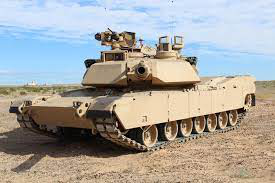

In [ ]:
img=PILImage.create(upload.data[-1])
pred,pred_id,probs=learn.predict(img)
print(f'Predict:{pred}')
print(f'Probability:{probs[pred_id]*100:.1f}%')
img

From model to product


##Deploy

To convert our model to a web application, we use the Streamlit library and call it Streamlit

We deploy the cloud itself.

For this:

  • You must use an IDE (VS Code, Sublime text, Spyder, etc.)

  • You can use the virtual environment

  • You will need to be able to use Github

In [ ]:
learn.export('Weapons_model.pk1')


In [ ]:
model = load_learner("/content/Weapons_model.pk1")

In [ ]:
model.predict(img)

('Tank', TensorBase(2), TensorBase([2.7456e-09, 1.2121e-04, 9.9988e-01]))